In [14]:
import os
import sys
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from pathlib import Path
import json

class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        #if logs['loss'] < 0.00001:
        if logs['loss'] < 0.1:
            print()
            print("Loss is low so cancelling training.")
            self.model.stop_training = True

print("\nVersiones:")
print(f"- Python {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro}")
print(f"- TensorFlow {tf.__version__}")
print(f"- tf.Keras {tf.keras.__version__}")


Versiones:
- Python 3.9.23
- TensorFlow 2.18.0
- tf.Keras 3.10.0


In [15]:
# Directorios del dataset
base_dir = "/content/cats_and_dogs_small"

train_dir = os.path.join(base_dir, "train")
train_cats_dir = os.path.join(train_dir, "cats")
train_dogs_dir = os.path.join(train_dir, "dogs")
                              
validation_dir = os.path.join(base_dir, "validation")
validation_cats_dir = os.path.join(validation_dir, "cats")
validation_dogs_dir = os.path.join(validation_dir, "dogs")

test_dir = os.path.join(base_dir, "test")
test_cats_dir = os.path.join(test_dir, "cats")
test_dogs_dir = os.path.join(test_dir, "dogs")

# Número de ficheros (imágenes) en el dataset
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)
validation_cat_fnames = os.listdir(validation_cats_dir)
validation_dog_fnames = os.listdir(validation_dogs_dir)
test_cat_fnames = os.listdir(test_cats_dir)
test_dog_fnames = os.listdir(test_dogs_dir)
print(f"Training cats: {len(train_cat_fnames)}")
print(f"Training dogs: {len(train_dog_fnames)}")
print(f"Validation cats: {len(validation_cat_fnames)}")
print(f"Validation dogs: {len(validation_dog_fnames)}")
print(f"Test cats: {len(test_cat_fnames)}")
print(f"Test dogs: {len(test_dog_fnames)}")


Training cats: 1000
Training dogs: 1000
Validation cats: 500
Validation dogs: 500
Test cats: 500
Test dogs: 500


In [16]:
print("Definición del modelo")
model = Sequential()
model.add(Input(shape=(150, 150, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Definición del modelo


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
print("Compilación del modelo")
model.compile(loss="binary_crossentropy", optimizer=RMSprop(learning_rate=1e-4), metrics=['accuracy'])

Compilación del modelo


In [18]:
train_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
test_datagen = ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size=20, class_mode='binary', target_size=(150, 150))
validation_generator = validation_datagen.flow_from_directory(validation_dir, batch_size=20, class_mode='binary', target_size=(150, 150))
test_generator = test_datagen.flow_from_directory(test_dir, batch_size=20, class_mode='binary', target_size=(150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
# Entrenamiento del modelo
batch_size = 20
steps_per_epoch = train_generator.n
validation_steps = validation_generator.n

print("Entrenamiento del modelo")
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    steps_per_epoch=None,
    epochs=100,
    verbose=1,
    callbacks=[myCallBack()])


Entrenamiento del modelo
Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 225ms/step - accuracy: 0.5016 - loss: 0.6944 - val_accuracy: 0.5740 - val_loss: 0.6778
Epoch 2/100


/home/carlos/miniforge3/envs/deep_learning/lib/python3.9/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 243ms/step - accuracy: 0.5630 - loss: 0.6725 - val_accuracy: 0.6190 - val_loss: 0.6538
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 273ms/step - accuracy: 0.6034 - loss: 0.6526 - val_accuracy: 0.5990 - val_loss: 0.6446
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 278ms/step - accuracy: 0.6566 - loss: 0.6270 - val_accuracy: 0.6510 - val_loss: 0.6144
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 270ms/step - accuracy: 0.7017 - loss: 0.5840 - val_accuracy: 0.6770 - val_loss: 0.5965
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 222ms/step - accuracy: 0.7187 - loss: 0.5503 - val_accuracy: 0.6780 - val_loss: 0.5881
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 228ms/step - accuracy: 0.7226 - loss: 0.5307 - val_accuracy: 0.6570 - val_loss: 0.6159
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 234ms/step - accuracy: 0.7494 - loss: 0.5058 - val_accuracy: 0.6630 - val_loss: 0.6116
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 270ms/step - accuracy: 0.7606 - loss: 0.500

In [ ]:
# Guardo el modelo en disco
print("Saving the model")
model.save("/home/carlos/Documents/python/python_deep_learning/10/cats_and_dogs.keras")

In [20]:
# Guardo la historia en disco
print("Saving history")
file = Path("/home/carlos/Documents/python/python_deep_learning/10/cats_and_dogs_history.json")
content = json.dumps(history.history)
file.write_text(content)

Saving history


2381

In [ ]:
# Leo el modelo de disco
print("Loading the model")
model = keras.models.load_model("/home/carlos/Documents/python/python_deep_learning/10/cats_and_dogs.keras")

In [26]:
# Leo la historia de disco
print("Loading history")
file = Path("/home/carlos/Documents/python/python_deep_learning/10/cats_and_dogs_history.json")
content = file.read_text()
history_dict = json.loads(content)

Loading history


Claves del diccionario "History":
- accuracy
- loss
- val_accuracy
- val_loss
Número de epochs:  range(1, 30)


<Figure size 640x480 with 0 Axes>

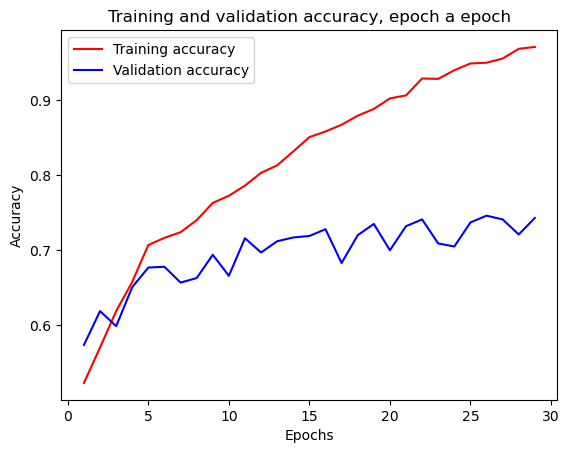

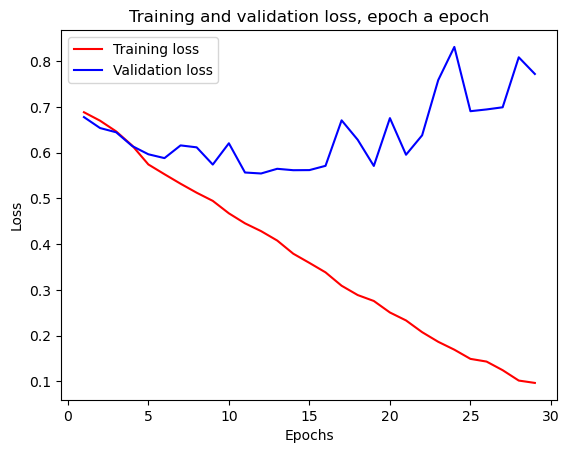

<Figure size 640x480 with 0 Axes>

In [27]:
history_dict = history.history
print(f'Claves del diccionario "History":')
for clave in history_dict.keys():
    print(f"- {clave}")

    
# Una lista con los valores para cada clave
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history[ 'val_loss']
epochs = range(1, len(acc)+1, 1)
print("Número de epochs: ", epochs)

# Training accuracy y Validation accuracy ciclo a ciclo
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy, epoch a epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.figure()

# Training loss y Validation loss ciclo a ciclo
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss, epoch a epoch')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.figure()


In [29]:
#Evaluación del modelo usando los datos de Validación o Evaluación
#Son datos no se han usado para el entrenamiento
print("Evaluación:")
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {int(test_acc*100)}%")

Evaluación:
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7531 - loss: 0.6575
Test accuracy: 73%
